In [26]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter 
import skimage.filters
from scipy.signal.signaltools import wiener

Q1. Consider a RC circuit with input voltage Vi = 10V applied to the series RC and output Vo taken from the ends of C with R = 47kΩ and C = 47nF. Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this?

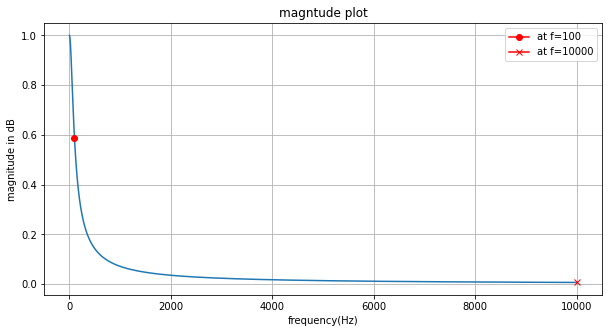

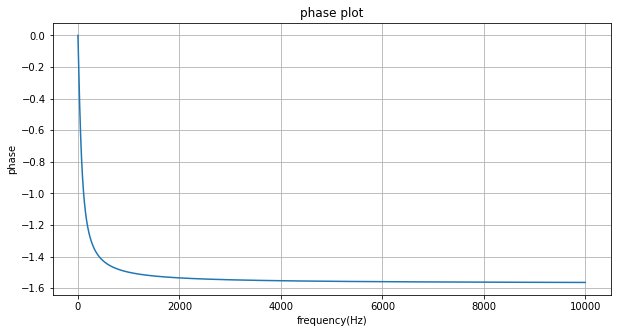

This is low pass filter
Vo at 100 Hz = (3.462501887574361-4.757741013788749j) volt
Vo at 10000 Hz = (0.0005191742530500389-0.07205187706503807j) volt


In [3]:
R=47*pow(10,3)
C=47*pow(10,-9)
Vi=10
f=np.arange(0,10000,1)
H_w=[1/complex(1,2*np.pi*i*R*C) for i in f]
magnitude=[abs(i) for i in H_w]
phase=[cmath.phase(i) for i in H_w]
plt.figure(figsize=(10,5))
plt.plot(f,magnitude)
plt.plot(99,abs(H_w[99]),marker='o',color='red',label='at f=100')
plt.plot(9999,abs(H_w[9999]),marker='x',color='red',label='at f=10000')
plt.grid()
plt.title("magntude plot")
plt.xlabel("frequency(Hz)")
plt.ylabel("magnitude in dB")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(f,phase)
plt.grid()
plt.title("phase plot")
plt.xlabel("frequency(Hz)")
plt.ylabel("phase")

plt.show()
print("This is low pass filter")
print("Vo at 100 Hz =",H_w[99]*Vi ,"volt")
print("Vo at 10000 Hz =",H_w[9999]*Vi,"volt")


Q2.Consider the same circuit mentioned before, but now the output voltage is taken across the resistor. Does this change the behaviour of the transfer function? Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this?

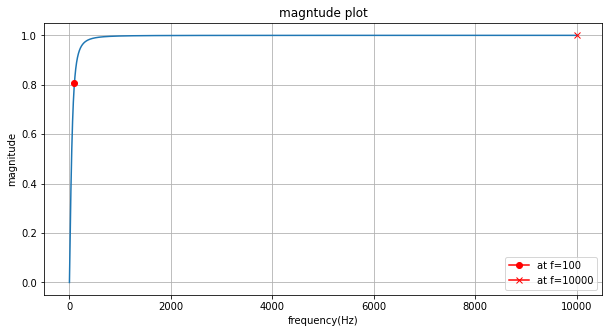

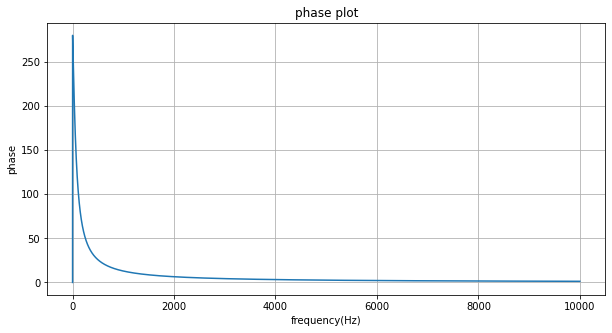

This is high pass filter
Vo at 100 Hz = (6.537498112425638+4.757741013788751j)
Vo at 10000 Hz = (9.99948082574695+0.07205187706503807j)


In [4]:
H_w=[complex(0,2*np.pi*i*R*C)/(complex(1,2*np.pi*R*i*C)) for i in f]
magnitude=[abs(i) for i in H_w]
phase=[180*(cmath.phase(i)) for i in H_w]
plt.figure(figsize=(10,5))
plt.plot(f,magnitude)
plt.grid()
plt.title("magntude plot")
plt.xlabel("frequency(Hz)")
plt.ylabel("magnitude")
plt.plot(99,abs(H_w[99]),marker='o',color='red',label='at f=100')
plt.plot(9999,abs(H_w[9999]),marker='x',color='red',label='at f=10000')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(f,phase)
plt.grid()
plt.title("phase plot")
plt.xlabel("frequency(Hz)")
plt.ylabel("phase")
plt.show()
print("This is high pass filter")
print("Vo at 100 Hz =",H_w[99]*Vi)
print("Vo at 10000 Hz =",H_w[9999]*Vi)

Q3. Design a second order low pass filter using RC circuit. Do the analysis for R = 50KΩ and C = 50nF. The input voltage waveform is 10 sin 2πt. Plot the amplitude and frequency spectrum.

This is a second order low pass filter with cutoff freqency = 63.6 Hz


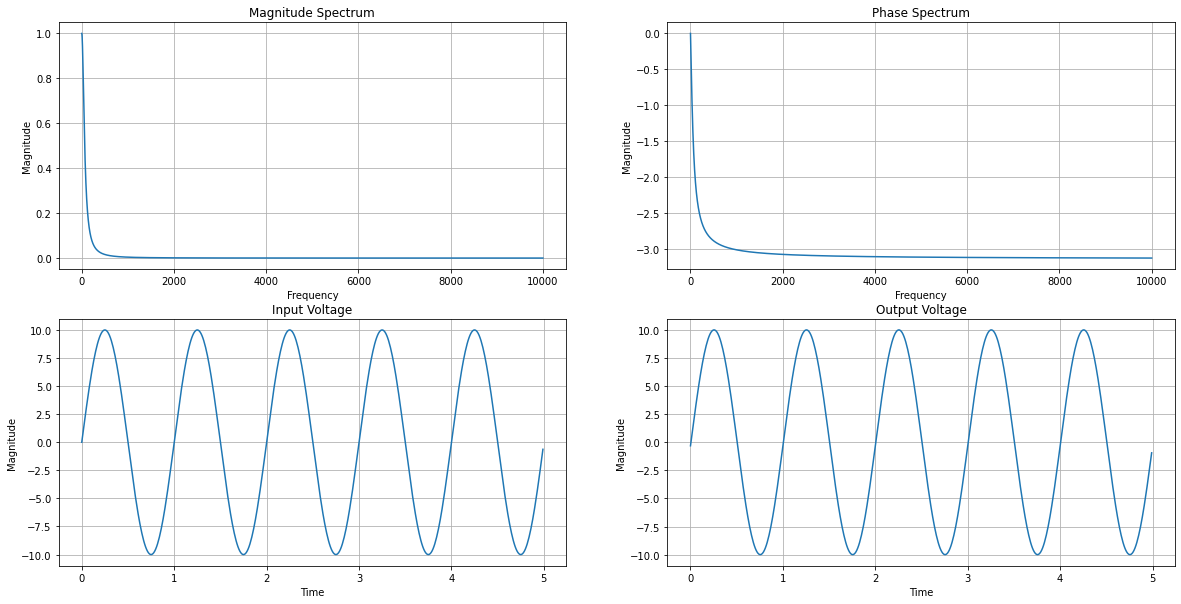

In [11]:
R = 50*(10**3)
C = 50*(10**-9)
t = np.arange(0,5,0.01)
vi = 10*np.sin(2*np.pi*t)
f = np.arange(0,10000,0.1)

H_low2 = ((1/(R*C))/((1j)*(2*np.pi*f) + 1/(R*C)))**2

mag_spect_low2 = abs(H_low2)
phase_spect_low2 = np.angle(H_low2)


plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid()
plt.plot(f,mag_spect_low2)

plt.subplot(2, 2, 2)
plt.title("Phase Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid()
plt.plot(f,phase_spect_low2)

for i in range(len(mag_spect_low2)):
  if round(mag_spect_low2[i],3) == 0.5:
    cutoff = i
    break

f_cutoff_low2 = f[cutoff]

plt.subplot(2, 2, 3)
plt.title("Input Voltage")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.grid()
plt.plot(t,vi)

f_sig = 1
H_sig = ((1/(R*C))/((1j)*(2*np.pi*f_sig) + 1/(R*C)))**2
mag_gain = abs(H_sig)
phase_gain = np.angle(H_sig) 
vo = mag_gain*10*(np.sin(2*np.pi*t + phase_gain))

plt.subplot(2, 2, 4)
plt.title("Output Voltage")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.grid()
plt.plot(t,vo)

print("This is a second order low pass filter with cutoff freqency =",f_cutoff_low2,"Hz")

Q4. Design a band pass filter using cascaded RC circuits. Make use of the values of the 2 resistors as 20KΩ. The filter should pass all the frequencies between 1kHz and 30kHz. Find the transfer function of the same and plot the magnitude and amplitude of the filter.

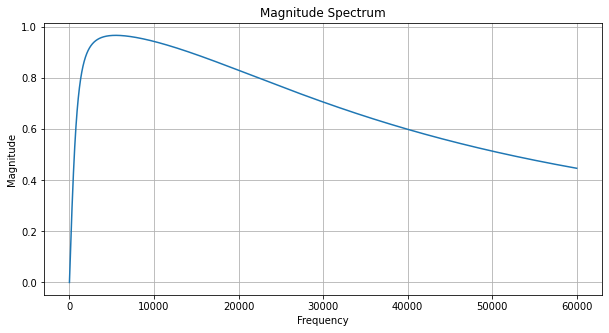

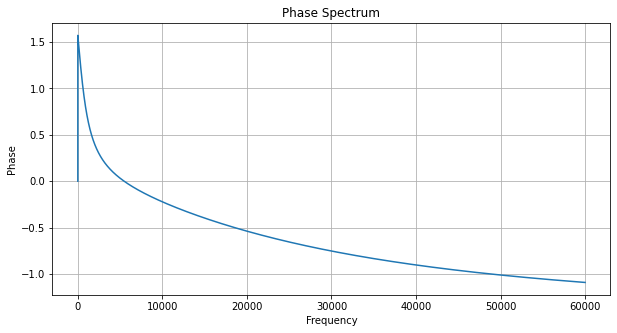

In [12]:
fl = 1 *(10**3)
fh = 30 *(10**3)
R = 20 *(10**3)
C1 = 1/(2*np.pi*R*fl)
C2 = 1/(2*np.pi*R*fh)
f = np.arange(0,60000,0.01)

H_highpass = ((1j)*(2*np.pi*f))/((1j)*(2*np.pi*f) + 1/(R*C1))
H_lowpass = (1/(R*C2))/((1j)*(2*np.pi*f) + 1/(R*C2))
H_bp = H_highpass*H_lowpass

mag_spect_bp = abs(H_bp)
phase_spect_bp = np.angle(H_bp)

plt.figure(1,figsize = (10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.plot(f,mag_spect_bp) 

plt.figure(2,figsize = (10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.title("Phase Spectrum")
plt.plot(f,phase_spect_bp) 

PART B: Digital filters

Q1. Consider the difference equation: y[n] = x[n] + x[n − 1]. Find the output of the system to the sequence: x[n] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10} What kind of filter is this? Compute the transfer function to plot the frequency and amplitude plots to verify your claim. Consider the sinusoidal input to the filter with unit amplitude. Take the sampling rate to be 1 Hz. Find and plot the filter output.

Output of the system to the sequence x[n] is given by - [ 3.  5.  7.  9. 11. 13. 15. 17. 19.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

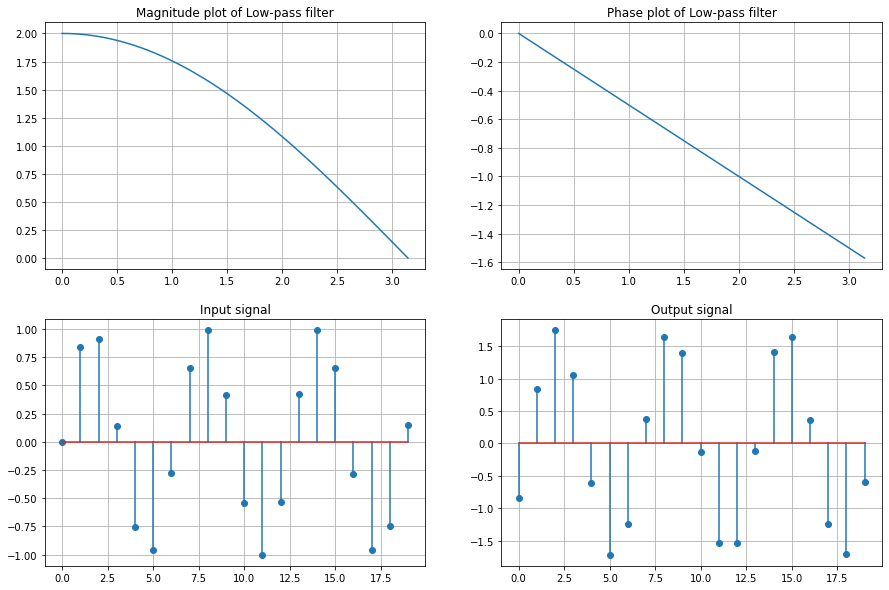

In [13]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n = np.arange(0,20,1)
y = np.zeros(len(x)-1)
w = np.arange(0,np.pi,0.001)

for i in range(1,len(x)):
  y[i-1] = x[i] + x[i-1]
print("Output of the system to the sequence x[n] is given by -",y)

# h(n) = del(n) + del(n-1)
# H(z) = (1+z)/z
# H(w) = 2|cos(w/2)|

H_mag = 2*abs(np.cos(w/2))
H_phase = np.arctan(np.sin(w)/(1+np.cos(w))) - w


inp = np.sin(n)
mag_gain = 2*abs(np.cos(1/2))
phase_gain = np.arctan(np.sin(1)/(1+np.cos(1))) - 1
out = mag_gain*np.sin(n+phase_gain)

plt.figure(1,figsize=(15,10))

plt.subplot(2, 2, 1)
plt.title("Magnitude plot of Low-pass filter")
plt.grid()
plt.plot(w,H_mag)

plt.subplot(2, 2, 2)
plt.title("Phase plot of Low-pass filter")
plt.grid()
plt.plot(w,H_phase)

plt.subplot(2, 2, 3)
plt.title("Input signal")
plt.grid()
plt.stem(n,inp)

plt.subplot(2, 2, 4)
plt.title("Output signal")
plt.grid()
plt.stem(n,out)

Q2. Consider the difference equation: y[n] = 1/3(x[n] + x[n − 1] + x[n − 2]) What is this filter called? Compute the transfer function to plot the frequency and amplitude spectrum. What are the applications of this filter? Improve the above filter by the differential equation: y[n] = 1/4(x[n]) + 1/2(x[n − 1]) + 1/4(x[n − 2]) and again do the whole analysis.

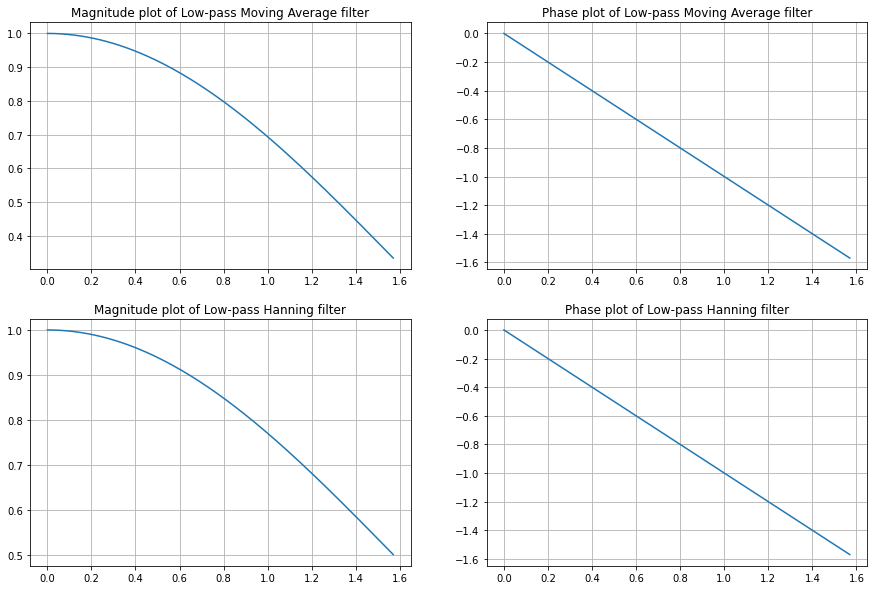

In [16]:
w = np.arange(0,np.pi/2,0.01)
H1 = 1/3*(1 + np.exp(-1j*w) + np.exp(-1j*2*w) )
H1_mag = abs(H1)
H1_phase = np.angle(H1)

# h2(n) = 1/4*del(n) + 1/2*del(n-1) + 1/4*del(n-2) # Hanning Filter
# H2(z) = 1/4 + 1/2*(z^-1) + 1/4*(z^-2)
H2 = 0.25 + 0.5*np.exp(-1j*w) + 0.25*np.exp(-1j*2*w)
H2_mag = abs(H2)
H2_phase = np.angle(H2)

fig = plt.figure(1,figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Magnitude plot of Low-pass Moving Average filter")
plt.grid()
plt.plot(w,H1_mag)

plt.subplot(2,2,2)
plt.title("Phase plot of Low-pass Moving Average filter")
plt.grid()
plt.plot(w,H1_phase)

plt.subplot(2,2,3)
plt.title("Magnitude plot of Low-pass Hanning filter")
plt.grid()
plt.plot(w,H2_mag)
plt.subplot(2,2,4)
plt.title("Phase plot of Low-pass Hanning filter")
plt.grid()
plt.plot(w,H2_phase)




Q3. Take any digital image of your choice and apply mean and median filtering. What are the differences between the two?

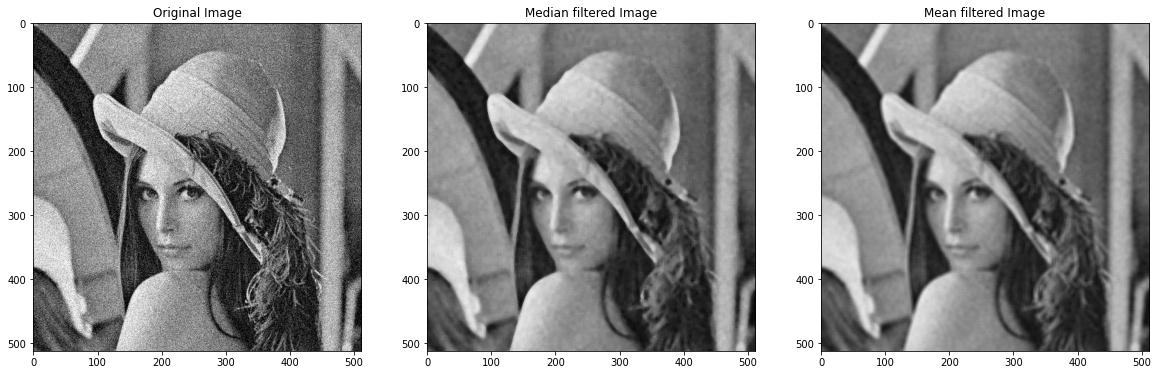

In [25]:

im= cv2.imread('/content/lenna.noise.jpg')
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
img_PIL = Image.fromarray(np.uint8(img))
fig = plt.figure(1,figsize=(20,20))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img_PIL)

# Median Filtering
img_median = img_PIL.filter(ImageFilter.MedianFilter(size = 7))
plt.subplot(1, 3, 2)
plt.title("Median filtered Image")
plt.imshow(img_median)

# Mean filtering
kernel = np.ones((7,7),np.float32)/49
img_mean = cv2.filter2D(img,-1,kernel)
plt.subplot(1, 3, 3)
plt.title("Mean filtered Image")
plt.imshow(img_mean)

Take an image and add speckle noise to it. Use a particular filter to remove this noise. Take another image and add salt and pepper noise and again use a particular filter to remove the noise. Plot the original images, noisy images and images after noise removal respectively.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


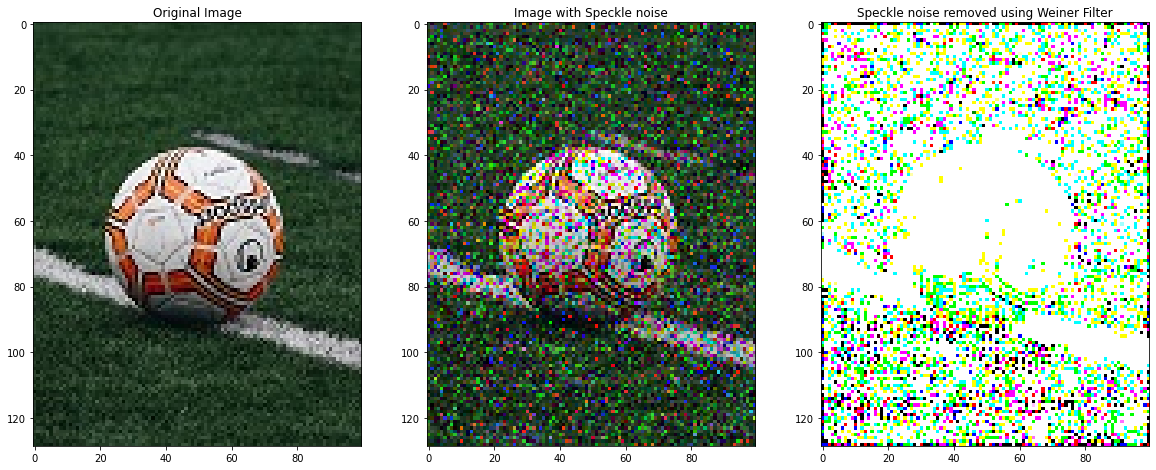

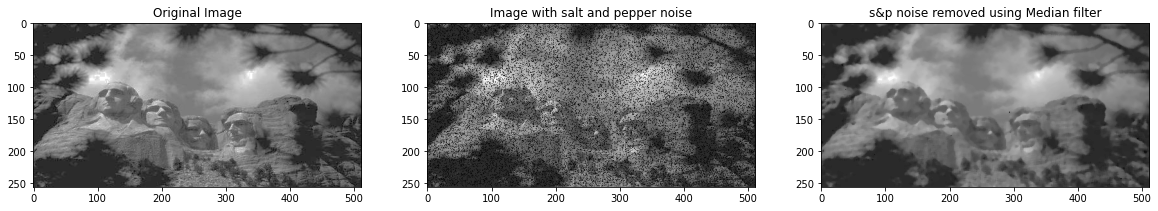

In [27]:
img = cv2.imread('/content/ground_truith.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(np.uint8(img1))
fig = plt.figure(1,figsize=(20,20))

gauss = np.random.normal(0,1,img1.size)
gauss = gauss.reshape(img1.shape[0],img1.shape[1],img1.shape[2]).astype('uint8')
img_speckle = img + img * gauss
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.title("Image with Speckle noise")
plt.imshow(img_speckle)

ax3 = fig.add_subplot(1, 3, 3)
plt.title("Speckle noise removed using Weiner Filter")
filtered_img = wiener(img_speckle)
plt.imshow(filtered_img)

fig = plt.figure(2,figsize=(20,20))
img = cv2.imread('/content/sphist.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 =  cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = Image.fromarray(np.uint8(img1))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")

# Adding salt and pepper noise
s_vs_p = 0.5
amount = 0.2
num_salt = np.ceil(amount * img1.size * s_vs_p)
coords_salt = [np.random.randint(0, i - 1, int(num_salt)) for i in img1.shape]
img1[coords_salt] = 1
num_pepper = np.ceil(amount* img1.size * (1 - s_vs_p))
coords_pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in img1.shape]
img1[coords_pepper] = 0
plt.subplot(1, 3, 2)
plt.title("Image with salt and pepper noise")
plt.imshow(img1,cmap="gray")

img_PIL = Image.fromarray(np.uint8(img1))
img_PIL_median = img_PIL.filter(ImageFilter.MedianFilter(size = 5))
plt.subplot(1, 3, 3)
plt.title("s&p noise removed using Median filter")
plt.imshow(img_PIL_median,cmap="gray")

Q4. Can we convert an analog filter into a digital filter altogether? What is the way to do it? Use the technique to convert all the analog filters into digital filters and plot the amplitude and frequency plots.

Yes, we can convert analog to digital filter using the bilinear transformation. This method is entirely a frequency-domain method, and as a result, some of the optimal properties of the analog filter are preserved. The bilinear transformation is a change of variables (a mapping) that is linear in both the numerator and denominator.

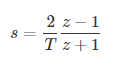

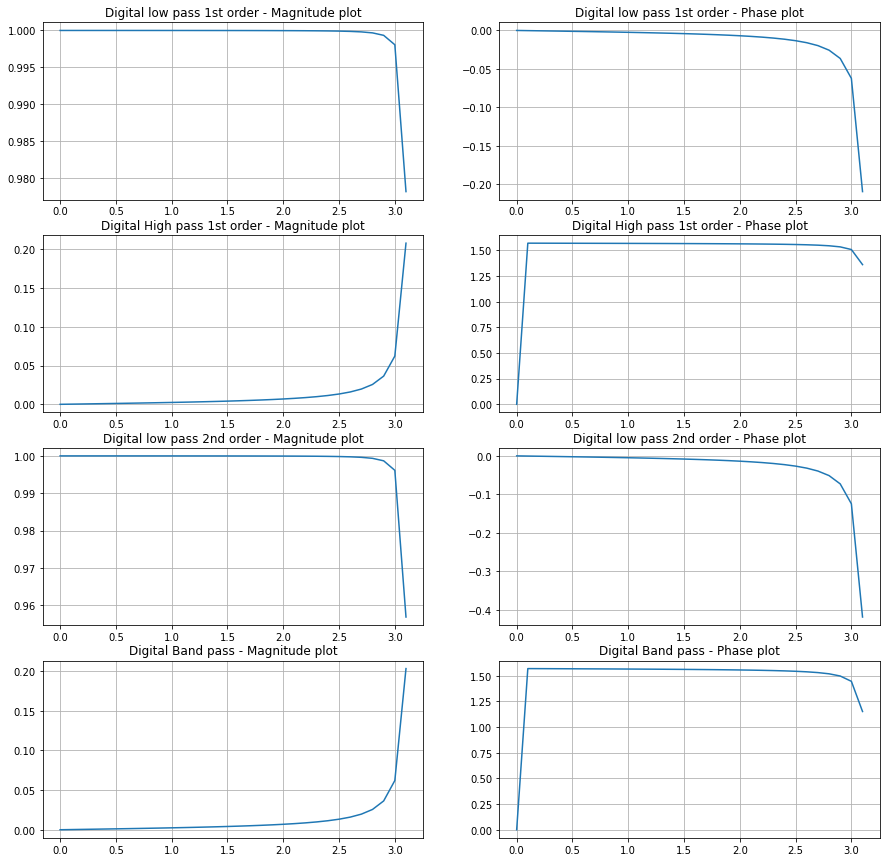

In [32]:
# Converting analog to digital filters

R = 47*(10**3)
C = 47*(10**-9)
fl = 1 *(10**3)
fh = 30 *(10**3)
C1 = 1/(2*np.pi*R*fl)
C2 = 1/(2*np.pi*R*fh)

f = np.arange(0,10000,0.1)
w = np.arange(0,np.pi,0.1)
T = 1
#s = (2/T)*[(exp(jw) - 1)/(exp(jw) + 1)]
s = (2/T)*((np.exp(1j*w) - 1)/(np.exp(1j*w) + 1))

H_low_analog = (1/(R*C))/((1j)*(2*np.pi*f) + 1/(R*C))
H_low_digital = (1/(R*C))/(s + 1/(R*C))

H_high_analog = ((1j)*(2*np.pi*f))/((1j)*(2*np.pi*f) + 1/(R*C))
H_high_digital = s/(s + 1/(R*C))

H_low2_analog = ((1/(R*C))/((1j)*(2*np.pi*f) + 1/(R*C)))**2
H_low2_digital = ((1/(R*C))/(s + 1/(R*C)))**2

H_bp_analog = H_high_analog*H_low_analog
H_bp_digital = H_high_digital*H_low_digital

fig = plt.figure(1,figsize=(15,15))
plt.subplot(4, 2, 1)
plt.title("Digital low pass 1st order - Magnitude plot")
plt.grid()
plt.plot(w,abs(H_low_digital))

plt.subplot(4, 2, 2)
plt.title("Digital low pass 1st order - Phase plot")
plt.grid()
plt.plot(w,np.angle(H_low_digital))

plt.subplot(4, 2, 3)
plt.title("Digital High pass 1st order - Magnitude plot")
plt.grid()
plt.plot(w,abs(H_high_digital))

plt.subplot(4, 2, 4)
plt.title("Digital High pass 1st order - Phase plot")
plt.grid()
plt.plot(w,np.angle(H_high_digital))

plt.subplot(4, 2, 5)
plt.title("Digital low pass 2nd order - Magnitude plot")
plt.grid()
plt.plot(w,abs(H_low2_digital))
plt.subplot(4, 2, 6)
plt.title("Digital low pass 2nd order - Phase plot")
plt.grid()
plt.plot(w,np.angle(H_low2_digital))

plt.subplot(4, 2, 7)
plt.title("Digital Band pass - Magnitude plot")
plt.grid()
plt.plot(w,abs(H_bp_digital))

plt.subplot(4, 2, 8)
plt.title("Digital Band pass - Phase plot")
plt.grid()
plt.plot(w,np.angle(H_bp_digital))